# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [21]:
import pandas as pd
import seaborn as sns

In [3]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-05-18T23:12:19+00:00

CPython 3.7.7
IPython 7.14.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
pandas 1.0.3

Git hash: 7c7c2ede423997d8b3fa48946dbe1518ca64d4e8
Git repo: https://github.com/ysraell/examples.git
Git branch: master


In [300]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [252]:
df_train['NU_NOTA_CH']

0        495.4
1        544.1
2          NaN
3          NaN
4          NaN
         ...  
13725    419.7
13726    557.9
13727    528.9
13728    621.7
13729    575.3
Name: NU_NOTA_CH, Length: 13730, dtype: float64

In [253]:
df = df_train[list(df_test.columns)]
df['NU_NOTA_MT'] = df_train['NU_NOTA_MT']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


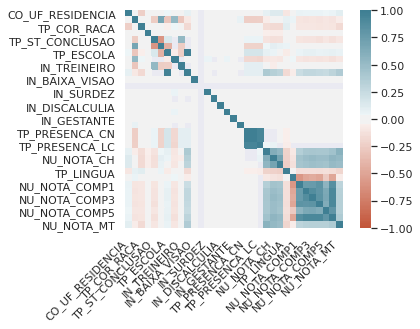

In [255]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

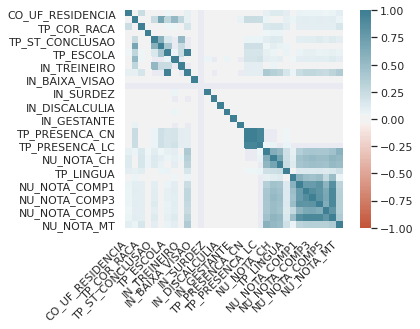

In [256]:
corr = abs(df.corr())
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


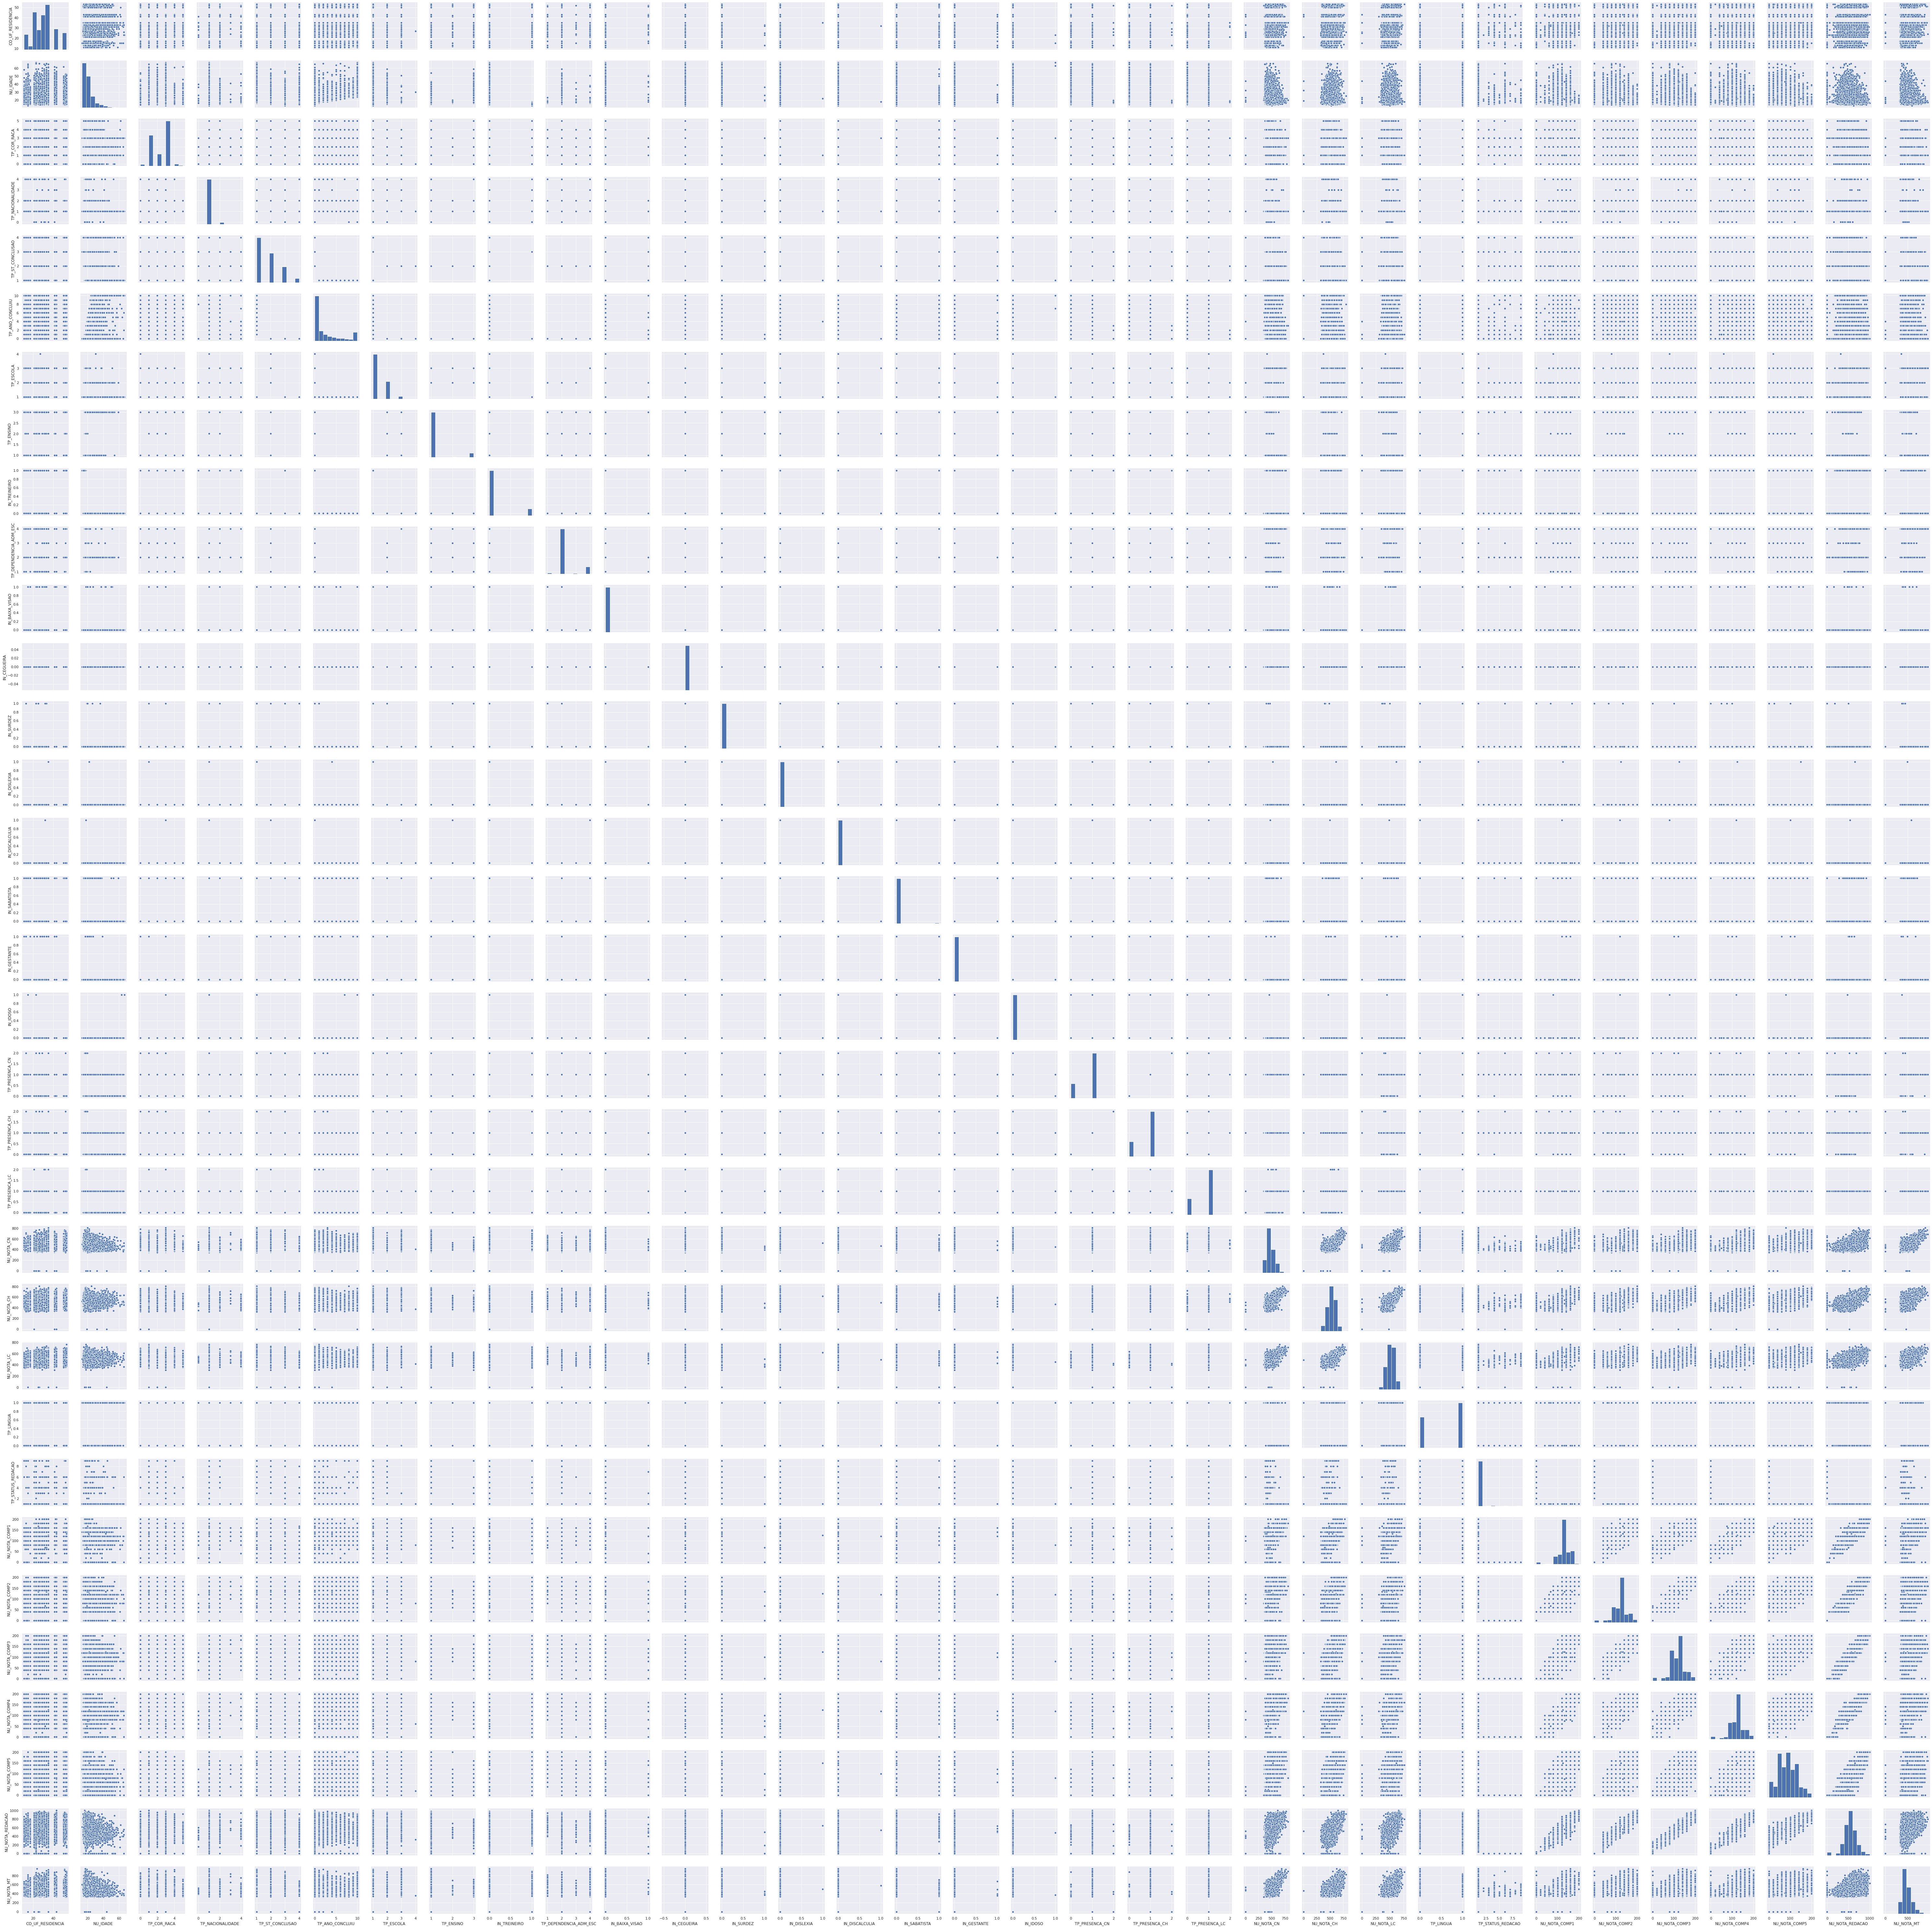

In [25]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [301]:
feat_order = sorted(corr['NU_NOTA_MT'].dropna().to_dict().items(), key=lambda x: x[1], reverse=True)

cols_feat = [x[0] for x in feat_order if x[1] >= 0.2]

cols_feat

In [304]:
df = df_train[list(df_test.columns)]
df['NU_NOTA_MT'] = df_train['NU_NOTA_MT']
df = df[cols_feat]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [305]:
df_test = df_test[cols_feat[1:]]

In [306]:
df = df[cols_feat]

In [307]:
target = 'NU_NOTA_MT'
df = df.dropna().reset_index(drop=True)
#df = df.fillna(-1).reset_index(drop=True)
#df = df.fillna('NAN').reset_index(drop=True)
#df = df.loc[df[target] != 'NAN' ].reset_index(drop=True)

In [308]:
#df = df.loc[df[target].fillna(-2) > -1]

In [309]:
#df = df.fillna(-1).reset_index(drop=True)

In [310]:
#df = df.fillna('NAN').reset_index(drop=True)
#df = df.loc[df[target] != 'NAN' ].reset_index(drop=True)

In [311]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
features.head(5)


,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1,TP_LINGUA
0,459.8,474.5,544.1,599.0,580.0,2.0,120.0,80.0,120.0,120.0,140.0,1
1,529.2,420.1,604.2,484.5,560.0,2.0,120.0,100.0,120.0,120.0,100.0,0
2,372.4,500.5,555.2,521.8,680.0,2.0,140.0,100.0,140.0,160.0,140.0,1
3,369.9,503.4,509.6,490.1,580.0,2.0,120.0,60.0,120.0,160.0,120.0,1
4,402.4,474.4,540.0,517.4,460.0,2.0,80.0,60.0,120.0,80.0,120.0,1


In [312]:
import numpy as np

# Labels are the values we want to predict
labels = np.array(features[target])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop(target, axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features_nparray = np.array(features)

In [313]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_nparray, labels, test_size = 0.1, random_state = 42)

In [314]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3265, 11)
Training Labels Shape: (3265,)
Testing Features Shape: (363, 11)
Testing Labels Shape: (363,)


In [315]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = -1, verbose = 1)

In [316]:
# Train the model on training data
rf.fit(train_features, train_labels);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [317]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.1s finished


In [318]:

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points')
print('SD Absolute error: ', round(np.std(errors), 2))
print('Minimal Absolute error: ', round(np.min(errors), 2))
print('Maximal Absolute error: ', round(np.max(errors), 2))

Mean Absolute Error: 55.81 points
SD Absolute error:  41.66
Minimal Absolute error:  1.1
Maximal Absolute error:  210.3


In [244]:
from sklearn.linear_model import LinearRegression

In [247]:
ls = LinearRegression(n_jobs = -1)

In [248]:
ls.fit(train_features, train_labels);

In [249]:
# Use the forest's predict method on the test data
predictions = ls.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [250]:

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points')
print('SD Absolute error: ', round(np.std(errors), 2))
print('Minimal Absolute error: ', round(np.min(errors), 2))
print('Maximal Absolute error: ', round(np.max(errors), 2))

Mean Absolute Error: 56.64 points
SD Absolute error:  43.37
Minimal Absolute error:  0.42
Maximal Absolute error:  277.43


In [141]:
from tabulate import tabulate as tb
# Minimum square error.
# Return mse, threshold, total samples <=, total samples >

def mse(num_feat,train_features,train_labels):
    mean_featu = train_features[:,num_feat].mean()
    templeq = train_features[:,num_feat] <= mean_featu
    tempg = train_features[:,num_feat] >= mean_featu
    mse_out = train_labels[templeq].std()+train_labels[tempg].std()
    return mse_out, mean_featu, (templeq*1).sum(), (tempg*1).sum()


# Function to get the best features to split (create a node).
# Return mse, threshold, best feature (number), total samples <=, total samples >

def best_split(train_features,train_labels):
    n = 1
    mse_out, mean_featu, numg, numl = mse(n,train_features,train_labels)
    for i in range(n+1,train_features.shape[1]):
        mse_temp, mean_temp, tnumg, tnuml = mse(i,train_features,train_labels)
        if (mse_out > mse_temp):
            mse_out = mse_temp
            n = i
            mean_featu = mean_temp
            numg = tnumg
            numl = tnuml
    return mse_out, mean_featu, n, numl, numg


# Function to create a root fo the tree.

def plant_the_tree(train_features,train_labels):
    tree = {}
    tree['node'] = best_split(train_features,train_labels)
    return tree


# Function to calculate the precision weight. For while, we choose 1.

def func_prec(arg_vec):
    return 1


# Function to make the splits and create the branchs.

def grow_tree(tree,train_features,train_labels,brachs,min_mse=0,min_min_samples_leaf=1):

    # node info
    mean_feat = tree['node'][1]
    n_feat = tree['node'][2]
    
    # for values greater than threshold
    
    # Spliting the data
    tempg = train_features[train_features[:,n_feat]>mean_feat,:]
    labelg = train_labels[train_features[:,n_feat]>mean_feat]
    
    # Start spliting greater.
    tree['greater'] = {}
    bs_temp = best_split(tempg,labelg)
    mean_feat_loc = bs_temp[1]
    n_feat_loc = bs_temp[2]
    
    # Branches available
    bool1 = brachs < 1
    # Min. samples remaining
    bool2 = bs_temp[4] <= min_min_samples_leaf
    # Min. MSE value.
    bool3 = bs_temp[0] <= min_mse
    
    if (bool1 or bool2 or bool3):
        # Create the leaf (final branch).
        tree['greater']['leaf']  = bs_temp
        target = labelg[tempg[:,n_feat_loc]>=mean_feat_loc].mean()
        prec = func_prec(labelg[tempg[:,n_feat_loc]>=mean_feat_loc])        
        tree['greater']['greater'] = [target, prec]
        target = labelg[tempg[:,n_feat_loc]<=mean_feat_loc].mean()
        prec = func_prec(labelg[tempg[:,n_feat_loc]<=mean_feat_loc])        
        tree['greater']['less'] = [target, prec]
    else:
        # Create a new node (one more branch).
        tree['greater']['node'] = bs_temp
        grow_tree(tree['greater'],tempg,labelg,(brachs-1))

    # for values equal or less than threshold
    
    # Spliting the data
    tempg = train_features[train_features[:,n_feat]<=mean_feat,:]
    labelg = train_labels[train_features[:,n_feat]<=mean_feat]

    # Start spliting greater.
    tree['less'] = {}
    bs_temp = best_split(tempg,labelg)
    mean_feat_loc = bs_temp[1]
    n_feat_loc = bs_temp[2]
    
    # Branches available
    bool1 = brachs < 1
    # Min. samples remaining
    bool2 = bs_temp[4] <= min_min_samples_leaf
    # Min. MSE value.
    bool3 = bs_temp[0] <= min_mse
    
    if (bool1 or bool2 or bool3):
        # Create the leaf (final branch).
        tree['less']['leaf']  = bs_temp
        target = labelg[tempg[:,n_feat_loc]>=mean_feat_loc].mean()
        prec = func_prec(labelg[tempg[:,n_feat_loc]>=mean_feat_loc])        
        tree['less']['greater'] = [target, prec]
        target = labelg[tempg[:,n_feat_loc]<=mean_feat_loc].mean()
        prec = func_prec(labelg[tempg[:,n_feat_loc]<=mean_feat_loc])        
        tree['less']['less'] = [target, prec]
    else:
        # Create a new node (one more branch).
        tree['less']['node'] = bs_temp
        grow_tree(tree['less'],tempg,labelg,(brachs-1))
    
    # Important to ensure the recursion  
    return tree


# Function to use a tree (model) to make a predcition given a sample (x).

def use_tree(tree,x):
    if ('node' in tree):
        bs_temp = tree['node']
        if (x[bs_temp[2]] >bs_temp[1]):
            return use_tree(tree['greater'],x)
        else:
            return use_tree(tree['less'],x)
    else:
        bs_temp = tree['leaf']
        if (x[bs_temp[2]] >bs_temp[1]):
            return tree['greater']
        else:
            return tree['less']

        
# Function to generate the forest. Using a different bacth for make each tree.
        
def gen_forest(NTree,train_features,train_labels,frac,branchs):
    forest = {}
    for i in range(0,NTree):
        train_features_mini, _, train_labels_mini, _, = train_test_split(train_features, train_labels, test_size = (1-frac), shuffle=True)
        forest[i] = plant_the_tree(train_features_mini,train_labels_mini)
        forest[i] = grow_tree(forest[i],train_features_mini,train_labels_mini,branchs)
    return forest


# Function to use a forest (ensemble model) to generate the erro prediction vector
# for all samples in a given dataset.

def use_forest(forest,test_features,test_labels):
    e = np.zeros((len(test_labels),1))
    for j in range(0,len(test_labels)):
        x = test_features[j,:]
        y_m = 0
        t_w = 0
        for i in range(0,len(forest)):
            y_hat, w = use_tree(forest[i],x)
            t_w += w
            y_m += y_hat*w
        y_m = y_m/t_w
        e[j] = abs(y_m-test_labels[j])
        # Plot the results
    #plt.figure()
    #plt.plot(e)
    #plt.xlabel("data")
    #plt.ylabel("Erro")
    #plt.title("Decision Tree Regression")
    #plt.legend()
    #plt.show()
    return e


# Function to do a set of experiments varying number of trees, limit of branchs and fraction
# of train dataset for each batch.

def run_exps(fran_vec,NTree_vec,branchs_vec):
    N = len(NTree_vec)
    K = len(fran_vec)
    T = len(branchs_vec)
    results = np.zeros((4,K,N,T))
    print('Start!')
    for t in range(0,T):
        branchs = branchs_vec[t]
        for n in range(0,N):
            NTree = NTree_vec[n]
            for k in range(0,K):
                forest = {}
                frac = fran_vec[k]
                print(str(k+1)+'/'+str(K)+' <> '+str(n+1)+'/'+str(N)+' <> '+str(t+1)+'/'+str(T), end='\r')
                forest = gen_forest(NTree,train_features,train_labels,frac,branchs)
                e = use_forest(forest,test_features,test_labels)

                results[0,k,n,t] = np.mean(e)
                results[1,k,n,t] = np.std(e)
                results[2,k,n,t] = np.min(e)
                results[3,k,n,t] = np.max(e)
    return results


# Function to do a test step to prune.

def tree_test_step(tree,test_features,test_labels):
    e = np.zeros((len(test_labels),1))
    for i in range(0,len(test_labels)):
        x = test_features[i,:]
        e[i] = abs(use_tree(tree,x)[0]-test_labels[i])
    return np.mean(e), np.std(e)


# The same fuction run_exps with prune function.

def run_exps_prune(fran_vec,NTree_vec,branchs_vec,min_pruned_samples):
    N = len(NTree_vec)
    K = len(fran_vec)
    T = len(branchs_vec)
    results = np.zeros((5,K,N,T))
    print('Start!')
    for t in range(0,T):
        branchs = branchs_vec[t]
        for n in range(0,N):
            NTree = NTree_vec[n]
            for k in range(0,K):
                forest = {}
                frac = fran_vec[k]
                min_erro = 0
                print(str(k+1)+'/'+str(K)+' <> '+str(n+1)+'/'+str(N)+' <> '+str(t+1)+'/'+str(T), end='\r')
                for i in range(0,NTree):
                    cont_prunes = 0
                    temp_error = 100
                    while (temp_error >= min_erro):
                        train_features_mini, test_features_mini, train_labels_mini, test_labels_mini, = train_test_split(train_features, train_labels, test_size = (1-frac), shuffle=True)
                        forest[i] = plant_the_tree(train_features_mini,train_labels_mini)
                        try:
                            forest[i] = grow_tree(forest[i],train_features_mini,train_labels_mini,branchs)
                        except:
                            forest[i] = forest[i-1]
                        temp_error, _ = tree_test_step(forest[i],test_features_mini,test_labels_mini)
                        if (temp_error > min_erro):
                            cont_prunes += 1
                        if (cont_prunes >= min_pruned_samples):
                            min_erro += 0.01
                            print(str(k+1)+'/'+str(K)+' <> '+str(n+1)+'/'+str(N)+' <> '+str(t+1)+'/'+str(T)+'. Th prune lower: '+str(min_erro)+'.', end='\r')

                e = np.zeros((len(test_labels),1))
                for j in range(0,len(test_labels)):
                    x = test_features[j,:]
                    y_m = 0
                    t_w = 0
                    for i in range(0,NTree):
                        y_hat, w = use_tree(forest[i],x)
                        t_w += w
                        y_m += y_hat*w
                    y_m = y_m/t_w
                    e[j] = abs(y_m-test_labels[j])

                results[0,k,n,t] = np.mean(e)
                results[1,k,n,t] = np.std(e)
                results[2,k,n,t] = np.min(e)
                results[3,k,n,t] = np.max(e)
                results[4,k,n,t] = min_erro
    return results

# Function to get the best result with model parameters.

def best_results(results,fran_vec,NTree_vec,branchs_vec,idx):
    ind = np.unravel_index(np.argmin(results[idx,:,:,:], axis=None), results[idx,:,:,:].shape)
    print(tb([['RFR '+"{:.2f}".format(fran_vec[ind[0]])+" / {:.2f} / ".format(NTree_vec[ind[1]])+str(branchs_vec[ind[2]]), \
               "{:.2f}".format(results[0,ind[0],ind[1],ind[2]])+" +-{:.2f}".format(results[1,ind[0],ind[1],ind[2]])+" ({:.2f}".format(results[2,ind[0],ind[1],ind[2]])+" / {:.2f})".format(results[3,ind[0],ind[1],ind[2]])]], \
        headers=["Method", "Erro (points)"], tablefmt='orgtbl'))
    print(' ')
    
    

In [147]:
#fran_vec = np.arange(0.1, 0.9, 0.1)
#NTree_vec  = np.arange(1, 20, 2)
#branchs_vec = np.arange(2, 5, 1)

fran_vec = np.arange(0.05, 0.1, 0.05)
NTree_vec  = np.arange(10, 100, 10)
branchs_vec = np.arange(3, 8, 1)

results1 = run_exps(fran_vec,NTree_vec,branchs_vec)
best_results(results1,fran_vec,NTree_vec,branchs_vec,0)
best_results(results1,fran_vec,NTree_vec,branchs_vec,1)

Start!
| Method               | Erro (points)                 |
|----------------------+-------------------------------|
| RFR 0.05 / 80.00 / 7 | 59.07 +-43.08 (0.16 / 284.41) |
 
| Method               | Erro (points)                 |
|----------------------+-------------------------------|
| RFR 0.05 / 20.00 / 4 | 59.89 +-42.69 (0.92 / 290.66) |
 
